# Inference of ligand-receptor interactions

Studying cell-cell interactions (CCI) is vital for understanding the complex communication networks that regulate cellular functions, tissue homeostasis, and disease mechanisms. CCI can be mediated through ligands binding to cognate receptors on receiver cells, which triggers downstream signaling events culminating in altered gene expression and cellular behavior. By integrating the spatial context with transcriptomic information, we can accurately map CCI in tissues. 

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list('WhRd',["#e5e5e5", "#fffacd", "red", "darkred"], N=256)  

In [2]:
import pySTIM as pst

In [3]:
adata_iri = pst.load_Xenium_iri_data()

Inferring ligand-receptor interactions involves calculating the expression levels of ligands and receptors in spatially proximate cells. Significant interactions are determined based on higher expression levels in spatially proximal cell pairs compared to distal pairs.

In [5]:
result = pst.compute_cci(
        adata=adata_iri,
        group="celltype",
        sender="FR_PT",
        receiver="Immune",
        contact_radius=30,
        p_value_threshold=0.05,
        spatial_key='spatial'
    )

CellChat ligand receptor database (Secreted Signaling only) dataset already exists at data/CellChatDB_lr_network_mouse.csv
Number of expressed ligand genes:  187
Number of expressed receptor genes:  175


Processing LR Pairs: 100%|████████████████████| 507/507 [04:32<00:00,  1.86it/s]


The returned result consists of two parts:

- `result['cell_pair']`: Includes all interacting sender and receiver cell pair indices.
- `result['lr_pair']`: Stores the significant ligand-receptor pairs.

Visualize the spatially interacting sender-receiver pairs to understand the distribution and significance of these interactions.

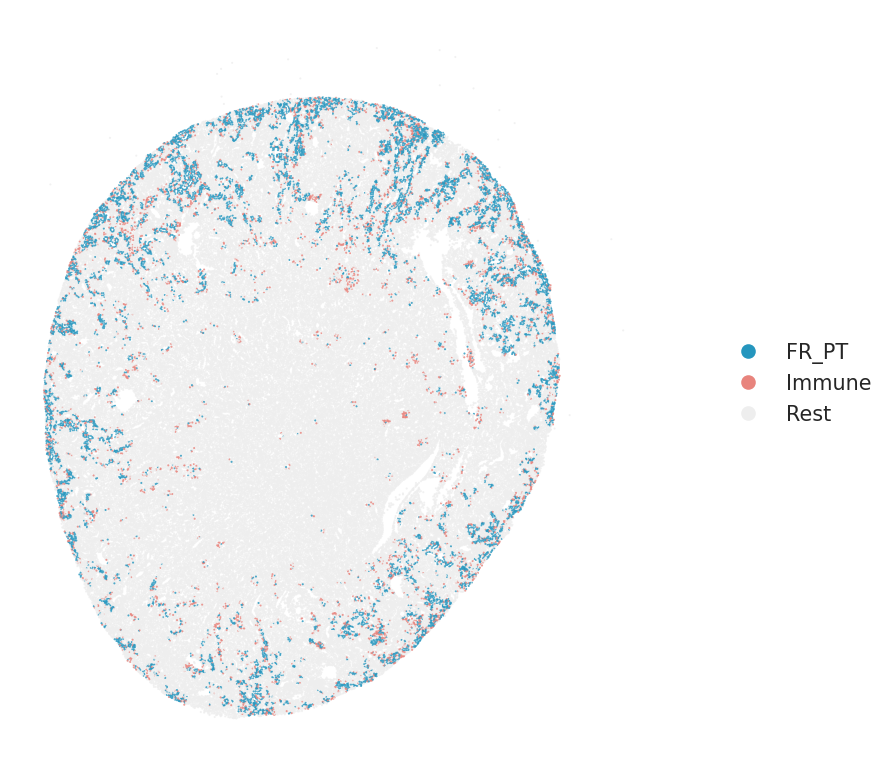

In [40]:
cmap_dict = {
            "FR_PT": '#2596be',
            "Immune": "#e8847d",
            "Rest": '#eeeeee'
        }
pst.vis_cci(adata_iri, result, cmap_dict = cmap_dict)

In [103]:
lr_result = result['lr_pair']
lr_result = lr_result.sort_values('LR_Score', ascending=False)
lr_result.head(5)

We can also visualize ligand-receptor interactions on spatial maps to see the expression of ligands in sender cell types and receptors in receiver cell types. 

Number of sender cells: 10134
Number of receiver cells: 7806


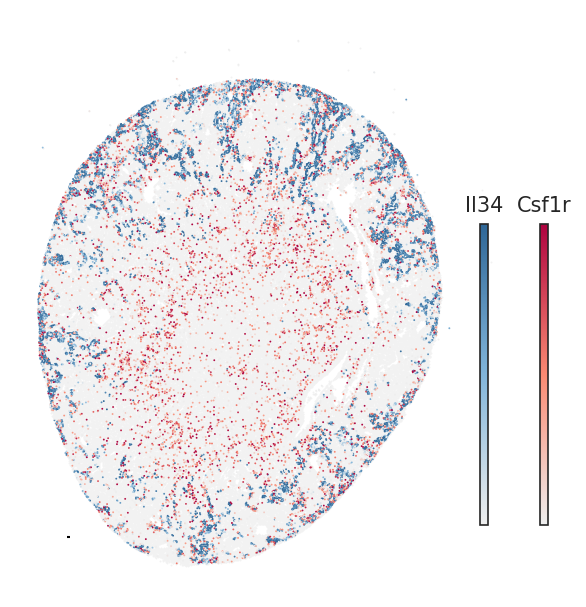

In [77]:
ligand = "Il34"
receptor = "Csf1r"
bg_color = '#ffffff'
group = 'celltype'
sender = "FR_PT"
receiver = "Immune"
ptsize = 0.8
cmap1 = mcolors.LinearSegmentedColormap.from_list('Blues', ["#eeeeee","#81b5da","#2f6797"], N=256)
cmap2 = mcolors.LinearSegmentedColormap.from_list('Reds', ["#eeeeee","#fa8a72","#ae0440"], N=256)
pst.vis_lr_cci_new(adata_iri, group, ligand, receptor, sender, receiver, bg_color, 
               cmap1, cmap2, ptsize, poly=False, ticks=False)

Number of sender cells: 124
Number of receiver cells: 52


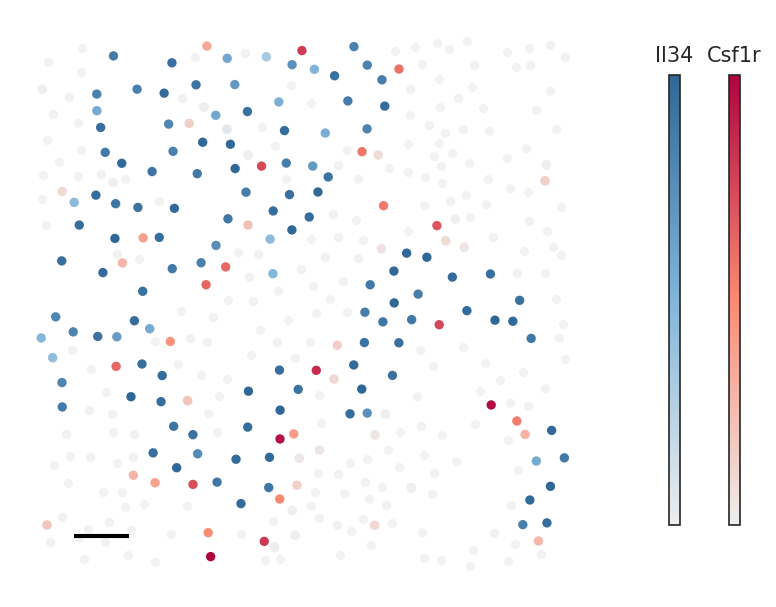

In [79]:
xlims = [1200,1400]
ylims = [850,1050]
ligand = "Il34"
receptor = "Csf1r"
bg_color = '#ffffff'
group = 'celltype'
sender = "FR_PT"
receiver = "Immune"
ptsize = 20

pst.vis_lr_cci_new(adata_iri, group, ligand, receptor, sender, receiver, bg_color, 
               cmap1, cmap2, ptsize, xlims = xlims, ylims = ylims, poly=False, ticks=False)

Visualize LR expression on cell polygons. 

In [70]:
poly_data_loaded = pst.Xenium_iri_poly.load_json()

In [74]:
adata_iri.uns["poly"] = poly_data_loaded
adata_iri.uns["poly"] = dict((k, adata_iri.uns["poly"][k]) for k in list(adata_iri.obs.index) if k in adata_iri.uns["poly"])

Number of sender cells: 124
Number of receiver cells: 52


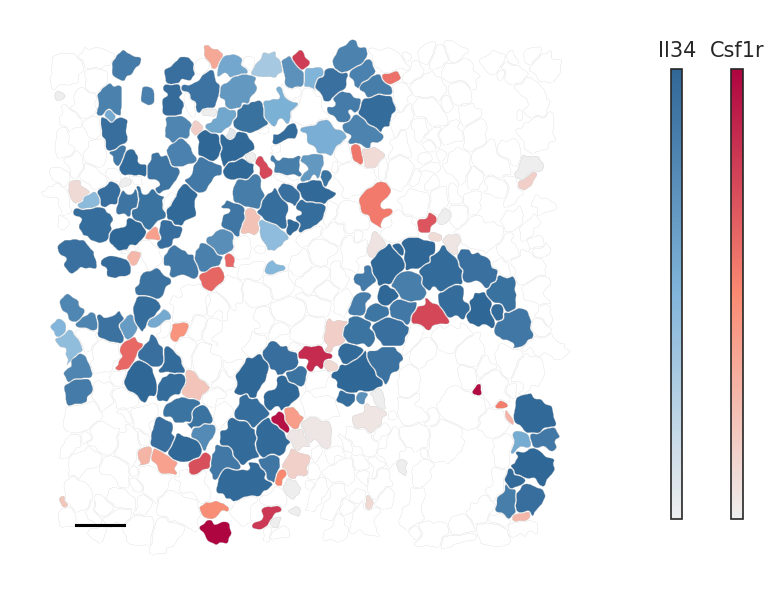

In [80]:
xlims = [1200,1400]
ylims = [850,1050]
ligand = "Il34"
receptor = "Csf1r"
bg_color = '#ffffff'
group = 'celltype'
sender = "FR_PT"
receiver = "Immune"

pst.vis_lr_cci_new(adata_iri, group, ligand, receptor, sender, receiver, bg_color, 
               cmap1, cmap2, ptsize, xlims = xlims, ylims = ylims, poly=True, ticks=False)

In [86]:
adata_iri.write_h5ad("Xenium-IRI-Day14R.h5ad")